In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
The data were drawn from https://ourworldindata.org/ which were in turn drawn from various official Greek sources.
Their coronavirus dataset is freely available in https://github.com/owid/covid-19-data/tree/master/public/data.

In [2]:
!rm ./owid-covid-data.csv
!wget https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

rm: cannot remove './owid-covid-data.csv': No such file or directory
--2021-01-02 21:24:35--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.16.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.16.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14202617 (14M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  13,54M  4,51MB/s    in 3,0s    

2021-01-02 21:24:43 (4,51 MB/s) - ‘owid-covid-data.csv’ saved [14202617/14202617]



# Take a look at the dataset

In [3]:
path = "owid-covid-data.csv"
df = pd.read_csv(path)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'ag

In [4]:
gr = df.loc[ df["location"] == "Greece" ]

In [5]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', 60):
    display(gr)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20177,GRC,Europe,Greece,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20178,GRC,Europe,Greece,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20179,GRC,Europe,Greece,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20180,GRC,Europe,Greece,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20181,GRC,Europe,Greece,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.096,0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,GRC,Europe,Greece,2020-12-28,135931.0,475.0,619.143,4672.0,66.0,59.286,13041.377,45.572,59.401,448.237,6.332,5.688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3309.0,2759530.0,264.752,0.317,10245.0,0.983,0.060,16.5,samples tested,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20488,GRC,Europe,Greece,2020-12-29,136976.0,1045.0,649.429,4730.0,58.0,55.714,13141.635,100.259,62.307,453.802,5.565,5.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15491.0,2775021.0,266.239,1.486,10064.0,0.966,0.065,15.5,samples tested,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20489,GRC,Europe,Greece,2020-12-30,137918.0,942.0,650.429,4788.0,58.0,55.143,13232.012,90.377,62.403,459.366,5.565,5.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14433.0,2789454.0,267.623,1.385,9940.0,0.954,0.065,15.3,samples tested,1763.0,0.02,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87
20490,GRC,Europe,Greece,2020-12-31,138850.0,932.0,659.286,4838.0,50.0,54.429,13321.429,89.417,63.253,464.163,4.797,5.222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13572.0,2803026.0,268.926,1.302,9863.0,0.946,0.067,15.0,samples tested,NaN,NaN,NaN,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21,82.24,0.87


In [6]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', 60):
    display(gr[["location", "date", "new_tests", "total_tests", "new_cases_smoothed", "icu_patients", "icu_patients_per_million", "hosp_patients"]]) #need display to show the dataframe when using with in jupyter

,location,date,new_tests,total_tests,new_cases_smoothed,icu_patients,icu_patients_per_million,hosp_patients
20177,Greece,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN
20178,Greece,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN
20179,Greece,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN
20180,Greece,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN
20181,Greece,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20487,Greece,2020-12-28,3309.0,2759530.0,619.143,NaN,NaN,NaN
20488,Greece,2020-12-29,15491.0,2775021.0,649.429,NaN,NaN,NaN
20489,Greece,2020-12-30,14433.0,2789454.0,650.429,NaN,NaN,NaN
20490,Greece,2020-12-31,13572.0,2803026.0,659.286,NaN,NaN,NaN


In [7]:
inf_gr = gr[["date", "new_tests", "total_tests", "new_cases", "icu_patients", "icu_patients_per_million", "hosp_patients"]].copy()
inf_gr = inf_gr.reset_index(drop=True)
inf_gr["date"] = pd.to_datetime( inf_gr["date"], dayfirst=False)

# Inference
There appear to be missing data both in the "new_tests" columns and in the "total_tests" columns. We use the "total_tests" column to infer "new_tests". Between two dates that do have a report of the cumulative number of tests, we assume a uniform distribution of the difference of the tests between those two dates.

In [8]:
num_tests = [] 
k = 0
last = 0
s = 0
for total in inf_gr["total_tests"]:
    if np.isnan(total):
        k += 1
    else:
        k += 1
        new = []
        new = [ (total - last) /(k) ] * (k)
        s += ((total - last) /(k)) * k
        num_tests.extend(new)
        last = total
        k = 0
if k != 0:
    num_tests.extend([np.nan]*k)

In [9]:
len(inf_gr["new_tests"])

315

In [10]:
inf_gr["new_tests"] = num_tests

In [11]:
import numpy as np
from scipy.signal import find_peaks

tests = np.array(num_tests)
argpeaks, _ = find_peaks(tests, height=30000)
peaks = tests[argpeaks]
print("Extreme peaks were found for the dates:")
print(inf_gr["date"].array[argpeaks])

Extreme peaks were found for the dates:
<DatetimeArray>
['2020-07-29 00:00:00', '2020-08-04 00:00:00', '2020-08-19 00:00:00']
Length: 3, dtype: datetime64[ns]


In [12]:
inf_gr["date"][argpeaks]

158   2020-07-29
164   2020-08-04
179   2020-08-19
Name: date, dtype: datetime64[ns]

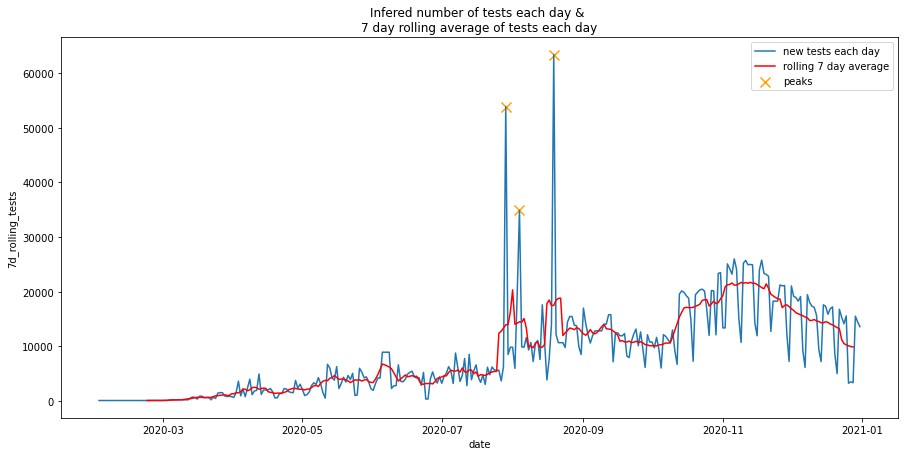

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="new_tests")
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.scatter(inf_gr["date"][argpeaks], peaks, marker='x', color='orange', s=100)
plt.title("Infered number of tests each day & \n7 day rolling average of tests each day")

inf_gr ["7d_rolling_tests"] = inf_gr.new_tests.rolling(7).mean().shift(-3)

g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_tests", color='red', ax=ax)
g.legend(["new tests each day", "rolling 7 day average", "peaks"])

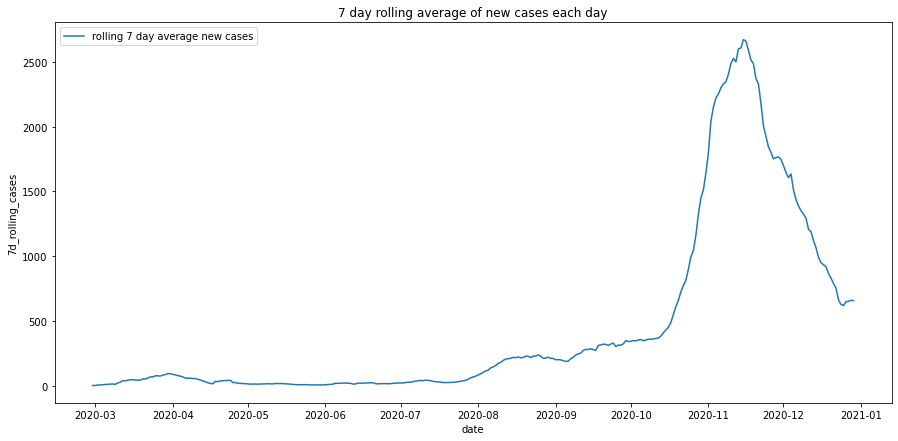

In [14]:
inf_gr ["7d_rolling_cases"] = inf_gr.new_cases.rolling(7).mean().shift(-3)
plt.figure(figsize=(15,7))

g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_cases")
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
plt.title("7 day rolling average of new cases each day")
g.legend(["rolling 7 day average new cases"])

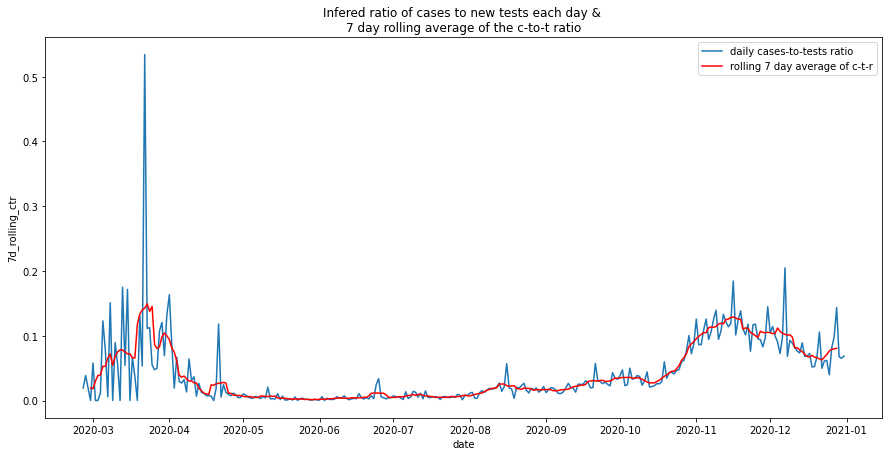

In [15]:
inf_gr["cases_tests_ratio"] = np.array(inf_gr["new_cases"].array) / np.array(inf_gr["new_tests"].array)


fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="cases_tests_ratio")
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
plt.title("Infered ratio of cases to new tests each day & \n7 day rolling average of the c-to-t ratio")

inf_gr ["7d_rolling_ctr"] = inf_gr.cases_tests_ratio.rolling(7).mean().shift(-3)

g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_ctr", color='red', ax=ax)
g.legend(["daily cases-to-tests ratio", "rolling 7 day average of c-t-r"])

# Visualizing curves with different range
In order to visualize the curves of "new tests" and "case-to-test ratio" and the curves of "7 day rolling average of tests" and "7 day rolling average of case-to-test ratio" in a way that would make comparison rather easy, the latter curve is scaled by means of normalizing the given curve and then multiplying the normalized values with the standard deviation of the former curve and adding its mean value.
<br>
The same goes for the pairs "new cases"/"case-to-test ratio" and "7 day rolling average of new cases"/" 7 day rolling average of case-to-test ratio".

Text(0.5, 1.0, 'Scaled ratio of tests to new cases each day over new daily new tests')

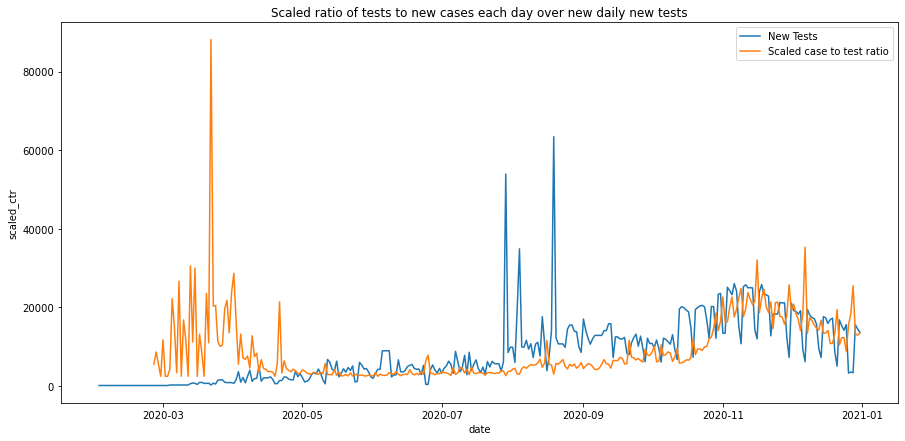

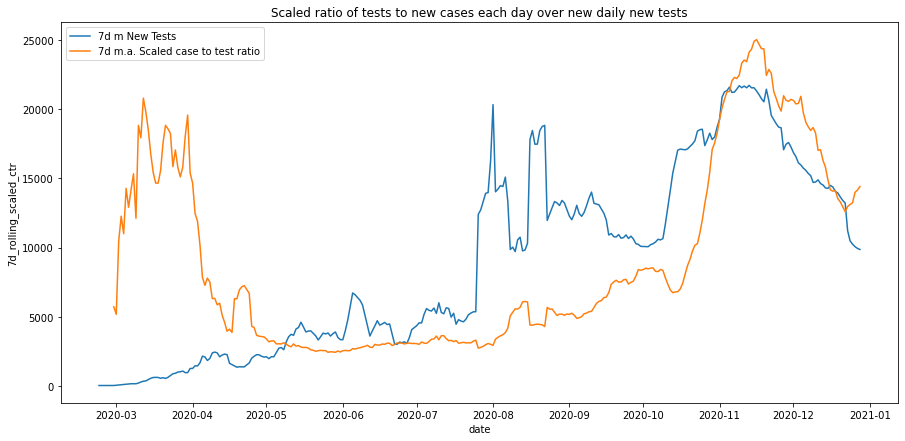

In [16]:
temp = np.array(inf_gr["new_cases"].array) / np.array(inf_gr["new_tests"].array)
temp = (temp - np.nanmean(temp)) / np.nanstd(temp)
temp = temp * np.nanstd(np.array(inf_gr["new_tests"].array)  )+ np.nanmean(np.array(inf_gr["new_tests"].array) )
inf_gr["scaled_ctr"] = temp
                                                                   
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="new_tests", ax=ax)
g = sns.lineplot(data=inf_gr, x="date", y="scaled_ctr", ax=ax)
# g.plot(temp)
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.legend(["New Tests", "Scaled case to test ratio"])
plt.title("Scaled ratio of tests to new cases each day over new daily new tests")

## moving average
temp = np.array(inf_gr["7d_rolling_cases"].array) / np.array(inf_gr["7d_rolling_tests"].array)
temp = (temp - np.nanmean(temp)) / np.nanstd(temp)
temp = temp * np.nanstd(np.array(inf_gr["7d_rolling_tests"].array)  )+ np.nanmean(np.array(inf_gr["7d_rolling_tests"].array) )
inf_gr["7d_rolling_scaled_ctr"] = temp
                                                                   
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_tests", ax=ax)
g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_scaled_ctr", ax=ax)
# g.plot(temp)
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.legend(["7d m New Tests", "7d m.a. Scaled case to test ratio"])
plt.title("Scaled ratio of tests to new cases each day over new daily new tests")

Text(0.5, 1.0, 'Scaled ratio of tests to new cases each day over new daily new tests')

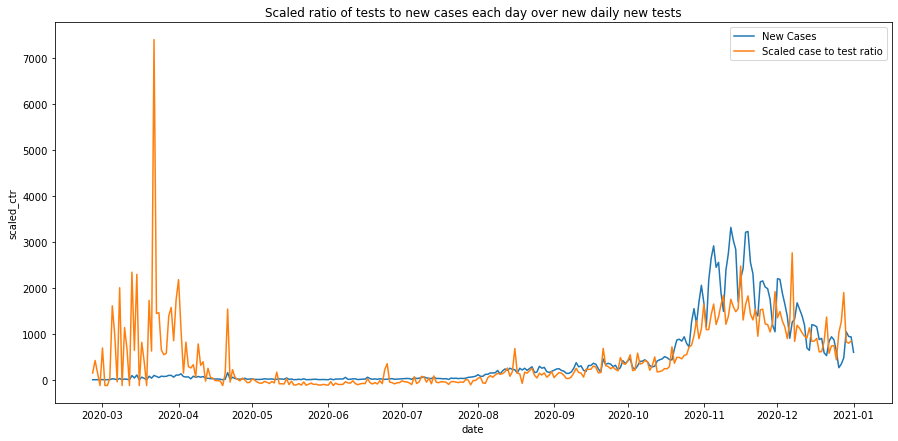

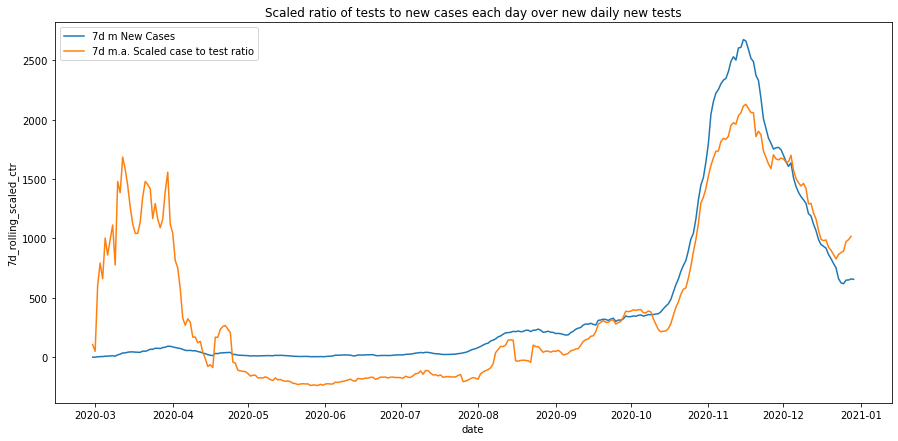

In [17]:
temp = np.array(inf_gr["new_cases"].array) / np.array(inf_gr["new_tests"].array)
temp = (temp - np.nanmean(temp)) / np.nanstd(temp)
temp = temp * np.nanstd(np.array(inf_gr["new_cases"].array)  )+ np.nanmean(np.array(inf_gr["new_cases"].array) )
inf_gr["scaled_ctr"] = temp
                                                                   
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="new_cases", ax=ax)
sns.lineplot(data=inf_gr, x="date", y="scaled_ctr", ax=ax)
# g.plot(temp)
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.legend(["New Cases", "Scaled case to test ratio"])
plt.title("Scaled ratio of tests to new cases each day over new daily new tests")

## moving average
temp = np.array(inf_gr["7d_rolling_cases"].array) / np.array(inf_gr["7d_rolling_tests"].array)
temp = (temp - np.nanmean(temp)) / np.nanstd(temp)
temp = temp * np.nanstd(np.array(inf_gr["7d_rolling_cases"].array)  )+ np.nanmean(np.array(inf_gr["7d_rolling_cases"].array) )
inf_gr["7d_rolling_scaled_ctr"] = temp
                                                                   
# plt.figure(figsize=(15,7))
fig, ax = plt.subplots(figsize=(15,7))
g = sns.lineplot(data=inf_gr, x="date", y="7d_rolling_cases", ax=ax)
sns.lineplot(data=inf_gr, x="date", y="7d_rolling_scaled_ctr", ax=ax)
# ax.axvline(x=idx)
# g.plot(temp)
# g.set(xticks=[ i for i in range(len(inf_gr)) if i%30==0] )
g.legend(["7d m New Cases", "7d m.a. Scaled case to test ratio"])
plt.title("Scaled ratio of tests to new cases each day over new daily new tests")

In [18]:
# Missing reports on ICU patients & Hospitalized patients
print("Number of missing values on ICU patients:\t\t", np.sum(np.isnan(inf_gr["icu_patients"]) ))
print("Number of missing values on ICU patients/mil:\t\t", np.sum(np.isnan(inf_gr["icu_patients_per_million"])) )
print("Number of missing values on Hospitalized Patients:\t", np.sum( np.isnan(inf_gr["hosp_patients"])))

Number of missing values on ICU patients:		 315
Number of missing values on ICU patients/mil:		 315
Number of missing values on Hospitalized Patients:	 315
